In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt



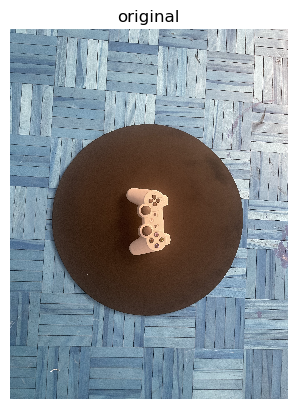

In [2]:
# Read image.
img = cv2.imread('ps_black.jpg', cv2.IMREAD_COLOR) 



plt.imshow(img)
plt.axis('off') 
plt.title('original')
plt.show()

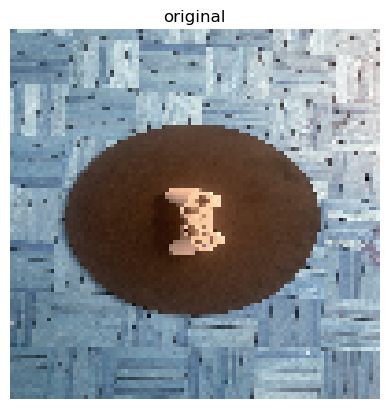

In [12]:
# Define the new dimensions
new_width = 100
new_height = 100

# Resize the image
resized_image = cv2.resize(img, (new_width, new_height))

plt.imshow(resized_image)
plt.axis('off') 
plt.title('original')
plt.show()



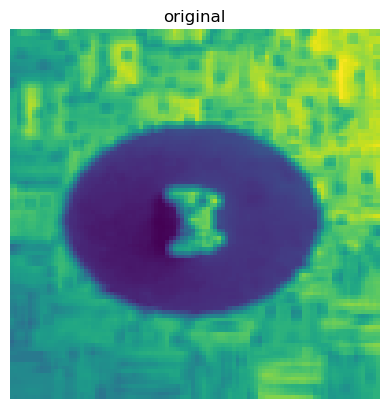

In [13]:
# Convert to grayscale.
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY) 

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3)) 


plt.imshow(gray_blurred)
plt.axis('off') 
plt.title('original')
plt.show()



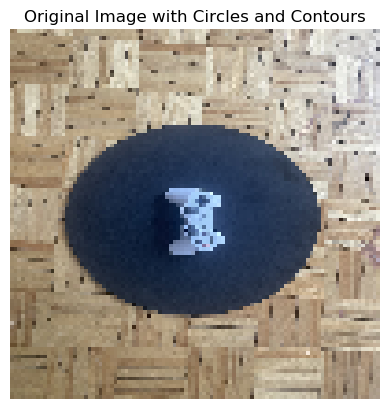

In [14]:
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred,
                                    cv2.HOUGH_GRADIENT_ALT,
                                    1.5,
                                    20,
                                    param1=50,
                                    param2=0.85,  # Increased param2 value
                                    minRadius=20,
                                    maxRadius=5000)  # Increased maxRadius value

# Draw circles that are detected and their contours.
if detected_circles is not None: 
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles)) 

    for pt in detected_circles[0, :1]: 
        a, b, r = pt[0], pt[1], pt[2] 

        # Draw the circumference of the circle.
        cv2.circle(resized_image, (a, b), r, (0, 255, 0), 2) 

        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(resized_image, (a, b), 1, (0, 0, 255), 3) 

        # Find contours around the detected circle.
        contours, _ = cv2.findContours(cv2.inRange(gray, 0, 0), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Draw contours onto the original image.
        cv2.drawContours(resized_image, contours, -1, (0, 0, 255), 2)

# Display the image with circles and contours.
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('Original Image with Circles and Contours')
plt.show()